# YOLO: You only look once

- Version 1: https://pjreddie.com/media/files/papers/yolo_1.pdf
- Version 2: https://pjreddie.com/media/files/papers/YOLO9000.pdf
- Verison 3: https://pjreddie.com/media/files/papers/YOLOv3.pdf



In [4]:
!pip install tqdm requests opencv-python

You should consider upgrading via the '/Users/paulmill/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [11]:
from tqdm import tqdm
import requests
import math
import os

if not os.path.exists("yolo/data/yolo.h5") or os.path.getsize("yolo/data/yolo.h5") < 248714728:
    print("Downloading " + str(248714728 / 1024 / 1024) + " MB.")

    url = "https://downloads.codingcoursestv.eu/037%20-%20neuronale%20netze/yolo.h5"
    # Streaming, so we can iterate over the response.
    r = requests.get(url, stream=True)

    # Total size in bytes.
    total_size = int(r.headers.get('content-length', 0)); 
    block_size = 1024
    with open('yolo/data/yolo.h5', 'wb') as f:
        for data in tqdm(r.iter_content(block_size), total=math.ceil(total_size//block_size), unit='KB', unit_divisor=1024, unit_scale=True):
            f.write(data)
else:
    print("Datei existiert bereits")




  0%|                                               | 0.00/237k [00:00<?, ?KB/s]


  0%|                                        | 257/237k [00:00<01:34, 2.57kKB/s]


  0%|▏                                       | 792/237k [00:00<00:57, 4.20kKB/s]


  1%|▏                                     | 1.23k/237k [00:00<00:54, 4.41kKB/s]


  1%|▎                                     | 1.75k/237k [00:00<00:50, 4.74kKB/s]


  1%|▍                                     | 2.43k/237k [00:00<00:43, 5.52kKB/s]


  1%|▍                                     | 3.08k/237k [00:00<00:41, 5.75kKB/s]


  2%|▌                                     | 3.74k/237k [00:00<00:39, 6.06kKB/s]


  2%|▋                                     | 4.33k/237k [00:00<00:40, 5.90kKB/s]


  2%|▊                                     | 4.90k/237k [00:00<00:45, 5.20kKB/s]


  2%|▉                                     | 5.56k/237k [00:01<00:42, 5.57kKB/s]


  3%|█                                     | 6.50k/237k [00:01<00:35, 6.70kKB/s]


 

 35%|█████████████▍                        | 83.8k/237k [00:09<00:15, 10.0kKB/s]


 36%|█████████████▌                        | 84.9k/237k [00:09<00:15, 10.2kKB/s]


 36%|█████████████▊                        | 86.1k/237k [00:10<00:14, 10.7kKB/s]


 37%|█████████████▉                        | 87.1k/237k [00:10<00:14, 10.6kKB/s]


 37%|██████████████▏                       | 88.3k/237k [00:10<00:13, 11.2kKB/s]


 38%|██████████████▎                       | 89.4k/237k [00:10<00:13, 10.9kKB/s]


 38%|██████████████▌                       | 90.5k/237k [00:10<00:13, 10.8kKB/s]


 39%|██████████████▋                       | 91.6k/237k [00:10<00:14, 10.4kKB/s]


 39%|██████████████▊                       | 92.6k/237k [00:10<00:17, 8.71kKB/s]


 40%|███████████████                       | 93.9k/237k [00:10<00:14, 9.84kKB/s]


 40%|███████████████▏                      | 94.9k/237k [00:10<00:16, 8.84kKB/s]


 40%|███████████████▎                      | 95.8k/237k [00:11<00:16, 8.95kKB/s]


 41%

 74%|████████████████████████████▋          | 175k/237k [00:19<00:07, 8.93kKB/s]


 74%|████████████████████████████▉          | 176k/237k [00:19<00:06, 10.1kKB/s]


 75%|█████████████████████████████          | 177k/237k [00:20<00:06, 9.49kKB/s]


 75%|█████████████████████████████▎         | 178k/237k [00:20<00:06, 10.0kKB/s]


 76%|█████████████████████████████▍         | 179k/237k [00:20<00:05, 10.2kKB/s]


 76%|█████████████████████████████▋         | 180k/237k [00:20<00:06, 9.61kKB/s]


 76%|█████████████████████████████▊         | 181k/237k [00:20<00:06, 9.47kKB/s]


 77%|█████████████████████████████▉         | 182k/237k [00:20<00:06, 9.29kKB/s]


 77%|██████████████████████████████         | 183k/237k [00:20<00:05, 9.36kKB/s]


 78%|██████████████████████████████▎        | 184k/237k [00:20<00:05, 9.60kKB/s]


 78%|██████████████████████████████▍        | 185k/237k [00:20<00:05, 10.4kKB/s]


 79%|██████████████████████████████▋        | 186k/237k [00:21<00:05, 9.61kKB/s]


 79%

In [12]:
import cv2
import numpy as np

from yolo import demo
from yolo.model.yolo_model import YOLO

In [15]:
yolo = YOLO(0.6, 0.5)
file = 'yolo/data/coco_classes.txt'
all_classes = demo.get_classes(file)

In [16]:
image = cv2.imread("yolo.jpg")
image = cv2.resize(image, (int(image.shape[1] / 2), int(image.shape[0] / 2)))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = demo.detect_image(image, yolo, all_classes)

time: 6.88s
class: person, score: 1.00
box coordinate x,y,w,h: [ -2.23425436 593.08541965 306.83801329 317.71829224]
class: car, score: 1.00
box coordinate x,y,w,h: [113.89160728 553.93124199 556.59817028 198.54358649]



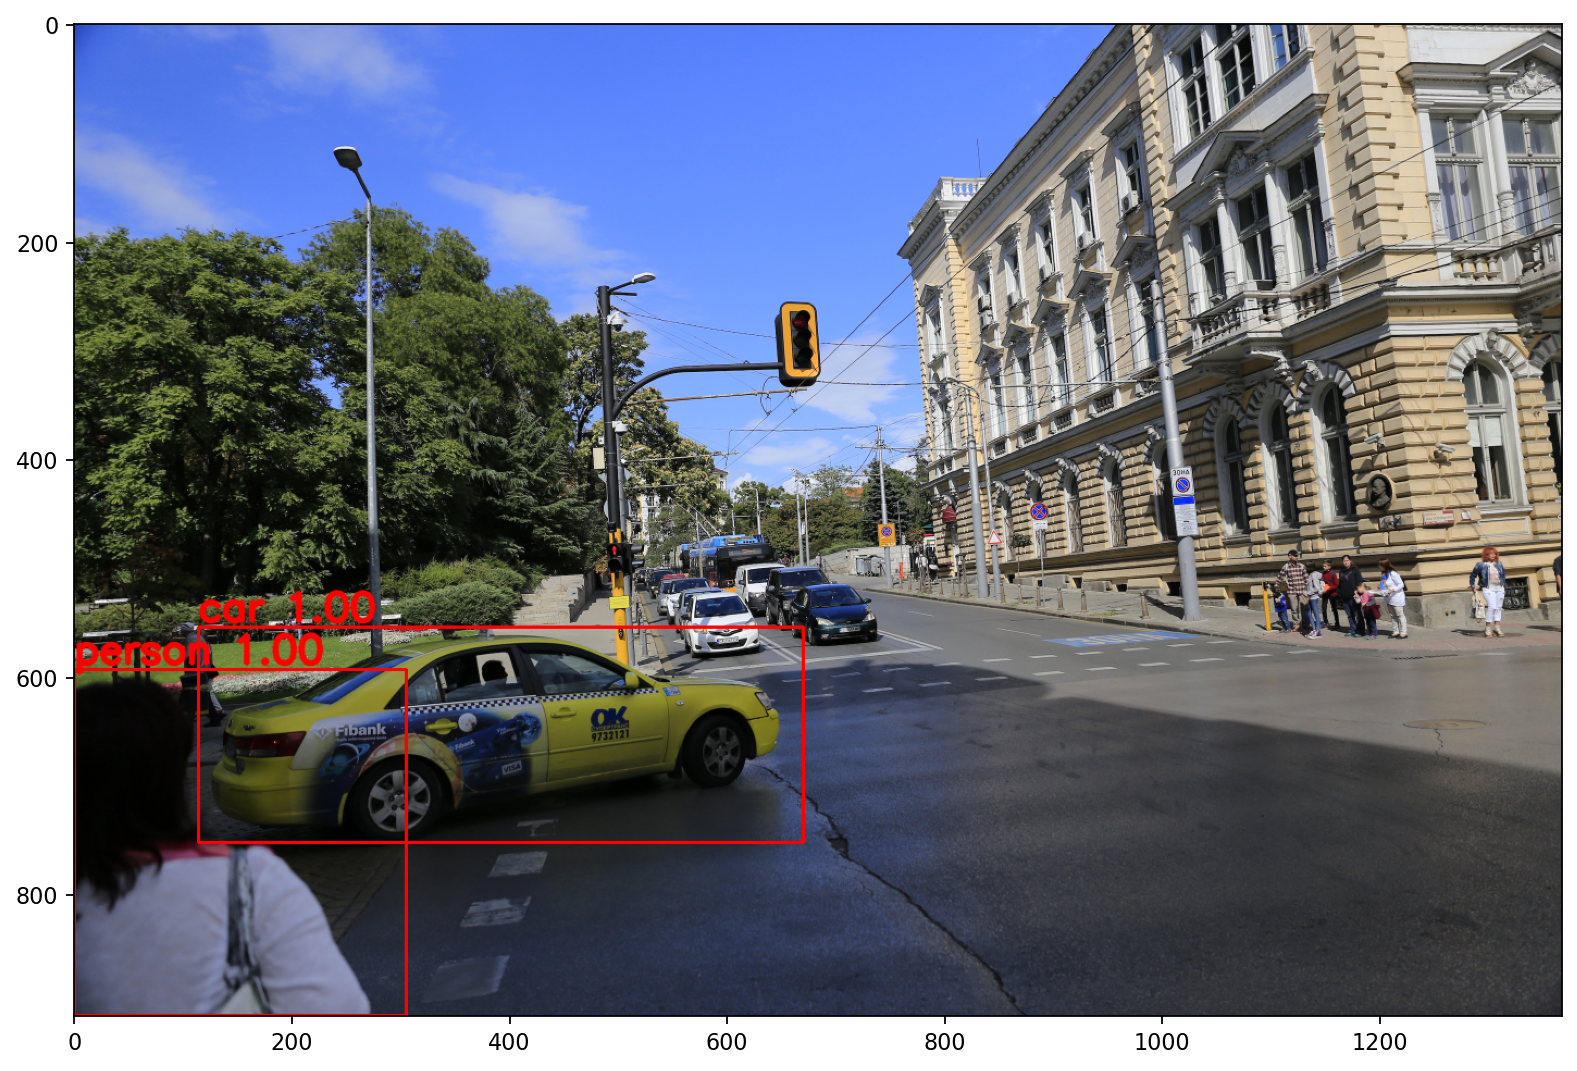

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')

plt.imshow(image)
plt.show()

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.imwrite("yolo_out.jpg", image)

True